## Machine Learning

## Decision Tree Regression

### individual household electric power consumption dataset

#### Dharavath Ramdas

Dataset and code link: https://github.com/dharavathramdas101/Machine-learning-Algorithms-Practical-implementation

In [1]:
### Pandas and Numpy
import pandas as pd
import numpy as np

### Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### To ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
df= pd.read_csv(r"C:\Users\DHARAVATH RAMDAS\Downloads\household_power_consumption\household_power_consumption.txt",sep=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


## merging two calloumns date and time and # missing values

In [5]:
df = pd.read_csv(r"C:\Users\DHARAVATH RAMDAS\Downloads\household_power_consumption\household_power_consumption.txt",sep=";",parse_dates={'dt':['Date','Time']}, infer_datetime_format= True, low_memory=False,na_values=['nan','?'],index_col='dt')

## taking sample dat 50,000

In [6]:
dfs = df.sample(n=50000,replace=False)
dfs.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2008-10-20 13:32:00,0.342,0.092,241.44,1.4,0.0,0.0,1.0
2008-01-15 03:55:00,0.342,0.000,244.62,1.6,0.0,0.0,0.0
2010-11-05 04:09:00,0.424,0.150,248.37,1.8,0.0,0.0,1.0
2010-04-17 05:58:00,0.254,0.052,239.96,1.0,0.0,0.0,1.0
2008-02-19 14:23:00,1.400,0.000,243.44,5.8,0.0,0.0,18.0


In [7]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2008-10-20 13:32:00 to 2007-12-07 11:22:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    49350 non-null  float64
 1   Global_reactive_power  49350 non-null  float64
 2   Voltage                49350 non-null  float64
 3   Global_intensity       49350 non-null  float64
 4   Sub_metering_1         49350 non-null  float64
 5   Sub_metering_2         49350 non-null  float64
 6   Sub_metering_3         49350 non-null  float64
dtypes: float64(7)
memory usage: 3.1 MB


In [8]:
# count the number of null values
dfs.isnull().sum()

Global_active_power      650
Global_reactive_power    650
Voltage                  650
Global_intensity         650
Sub_metering_1           650
Sub_metering_2           650
Sub_metering_3           650
dtype: int64

In [9]:
dfs.isnull().sum().sum()

4550

### fill nan values

    There are multiple ways to handle and fill missing values like mean, median, forward fill, backward fill, scikit learn Imputer methods, etc.

    For this problem, we will either use forward fill or backward fill. Reason: The records ahving null values are in between and the power used is recorded at every minute for 3-4 years. ffill() will fill last valid observation in next found Null record

In [11]:
dfs.ffill(axis=0,inplace=True)

In [12]:
dfs.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [13]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2008-10-20 13:32:00 to 2007-12-07 11:22:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    50000 non-null  float64
 1   Global_reactive_power  50000 non-null  float64
 2   Voltage                50000 non-null  float64
 3   Global_intensity       50000 non-null  float64
 4   Sub_metering_1         50000 non-null  float64
 5   Sub_metering_2         50000 non-null  float64
 6   Sub_metering_3         50000 non-null  float64
dtypes: float64(7)
memory usage: 3.1 MB


### Creating target variable

In [15]:
gap = (dfs['Global_active_power']*1000/60)
smt = dfs['Sub_metering_1'] + dfs['Sub_metering_2'] + dfs['Sub_metering_3']
dfs['power_consumption'] = gap - smt
dfs.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
dt,,,,,,,,
2008-10-20 13:32:00,0.342,0.092,241.44,1.4,0.0,0.0,1.0,4.700000
2008-01-15 03:55:00,0.342,0.000,244.62,1.6,0.0,0.0,0.0,5.700000
2010-11-05 04:09:00,0.424,0.150,248.37,1.8,0.0,0.0,1.0,6.066667
2010-04-17 05:58:00,0.254,0.052,239.96,1.0,0.0,0.0,1.0,3.233333
2008-02-19 14:23:00,1.400,0.000,243.44,5.8,0.0,0.0,18.0,5.333333


## Creating two more columns form index,date and time column seperately

    With the help of this new column 'Date', it will be easier to do grouping on the data which willl ease the work of Visualization for better understanding on Data¶

In [16]:
dfs['Date'] = dfs.index.date
dfs['time'] = dfs.index.time

### converting date datatype from object to datetime

In [18]:
dfs['Date'] = pd.to_datetime(dfs['Date'])

### Check the data type of all columns

In [20]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50000 entries, 2008-10-20 13:32:00 to 2007-12-07 11:22:00
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Global_active_power    50000 non-null  float64       
 1   Global_reactive_power  50000 non-null  float64       
 2   Voltage                50000 non-null  float64       
 3   Global_intensity       50000 non-null  float64       
 4   Sub_metering_1         50000 non-null  float64       
 5   Sub_metering_2         50000 non-null  float64       
 6   Sub_metering_3         50000 non-null  float64       
 7   power_consumption      50000 non-null  float64       
 8   Date                   50000 non-null  datetime64[ns]
 9   time                   50000 non-null  object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.2+ MB


## Grouping the entire data by date

In [22]:
df_data = dfs.groupby(['Date']).sum()

## checking wether the data is grouped day-wise

In [24]:
df_data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
Date,,,,,,,,
2006-12-16,56.632,2.046,4486.68,243.0,0.0,30.0,234.0,679.866667
2006-12-17,105.136,7.730,11793.05,446.4,77.0,47.0,436.0,1192.266667
2006-12-18,49.730,4.458,9180.73,208.0,2.0,11.0,353.0,462.833333
2006-12-19,37.156,3.620,9444.07,158.0,0.0,146.0,149.0,324.266667
2006-12-20,59.236,5.108,10198.93,247.0,0.0,7.0,411.0,569.266667


## Check the shape

In [26]:
dfs.shape

(50000, 10)

In [27]:
## Creating sub_dataframe of power consuption

    ##### Every 1 Watt-hour = 0.001 Kilowatt-hour. Example: 25000 Watt-hour = 25000 multiplied by 0.001 = 25 Kilowatt-hour.

df_power_consumption = df_data[['power_consumption']]

In [28]:
df_power_consumption.head()

,power_consumption
Date,
2006-12-16,679.866667
2006-12-17,1192.266667
2006-12-18,462.833333
2006-12-19,324.266667
2006-12-20,569.266667


## Creating sub-dataframe of sub-metering 1, sub-metering 2, sub-metering 3 

In [30]:
df_sub_meterings = df_data[['Sub_metering_1','Sub_metering_2','Sub_metering_3']]

In [31]:
df_sub_meterings.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,
2006-12-16,0.0,30.0,234.0
2006-12-17,77.0,47.0,436.0
2006-12-18,2.0,11.0,353.0
2006-12-19,0.0,146.0,149.0
2006-12-20,0.0,7.0,411.0


In [32]:
## # Creating sub-dataframe of Global_active_power, Global_reactive_power, and Global_intensity 
# (Global_active_power and Global_reactive_power measured in kilowatt whereas, Global_intensity measured in Ampere)
# kilowatt = (ampere * volt) / 1000

In [33]:
df_active_reactive = df_data[['Global_active_power','Global_reactive_power','Global_intensity']]

In [34]:
df_active_reactive.head()

,Global_active_power,Global_reactive_power,Global_intensity
Date,,,
2006-12-16,56.632,2.046,243.0
2006-12-17,105.136,7.730,446.4
2006-12-18,49.730,4.458,208.0
2006-12-19,37.156,3.620,158.0
2006-12-20,59.236,5.108,247.0


## Analysis of power consumption yearly

    checking statical summary of power consumption yearly

In [35]:
df_power_consumption.groupby(df_power_consumption.index.year).describe()

power_consumption                                                  \
                 count        mean         std         min         25%   
Date                                                                     
2006              16.0  694.856250  298.283013  324.266667  473.558333   
2007             365.0  341.815799  193.063352   69.400000  207.633333   
2008             366.0  327.600820  173.158248   32.900000  210.541667   
2009             365.0  305.300365  133.794041   67.900000  212.466667   
2010             330.0  290.483535  108.308153   73.366667  209.266667   

                                           
             50%         75%          max  
Date                                       
2006  603.616667  958.008333  1192.266667  
2007  288.733333  430.866667  1390.933333  
2008  307.150000  424.041667  1007.666667  
2009  287.633333  377.633333   846.433333  
2010  281.200000  359.900000   650.000000

## Yearly - Total watt-hour for Power Consumption

<AxesSubplot:title={'center':'Yearly - Total watt-hour for Power Consumption'}, xlabel='Year', ylabel='Readings in watt-hour'>

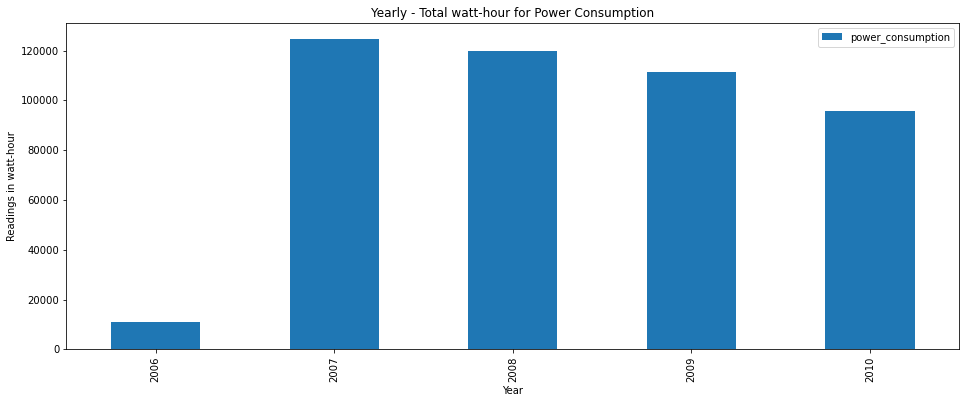

In [36]:
# Yearly - Total watt-hour for Power Consumption

df_power_consumption.groupby(df_power_consumption.index.year).sum().plot(kind="bar",xlabel='Year',ylabel='Readings in watt-hour',title="Yearly - Total watt-hour for Power Consumption", figsize=(16,6))

## Monthly - total watt-hour for power consumption

<AxesSubplot:title={'center':'monthly total watt hour for power consumption'}, xlabel='month', ylabel='readings in watt-hour'>

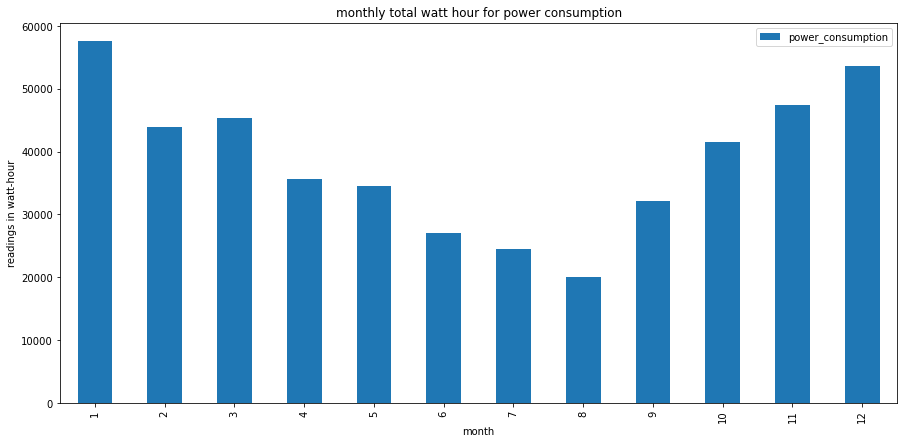

In [67]:
df_power_consumption.groupby(df_power_consumption.index.month).sum().plot(kind="bar",xlabel="month",ylabel="readings in watt-hour",title="monthly total watt hour for power consumption",figsize=(15,7))

## Quartely- total watt hour for power consumption

<AxesSubplot:title={'center':'Quarterly - Total watt-hour for Power Consumption'}, xlabel='Quarters', ylabel='Readings in watt-hour'>

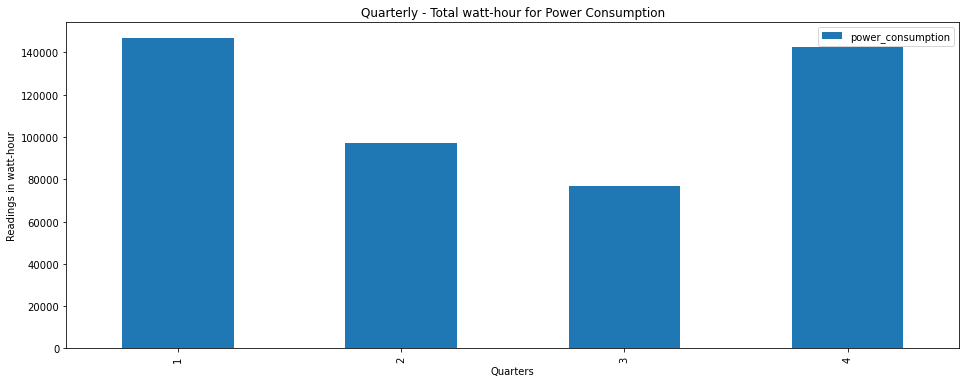

In [69]:
df_power_consumption.groupby(df_power_consumption.index.quarter).sum().plot(kind="bar",xlabel='Quarters',ylabel='Readings in watt-hour',title="Quarterly - Total watt-hour for Power Consumption", figsize=(16,6))

## weekly total watt-hour for power consumption

<AxesSubplot:title={'center':'weakly total watt hour for power consumption'}, xlabel='week', ylabel='readings in watt hour'>

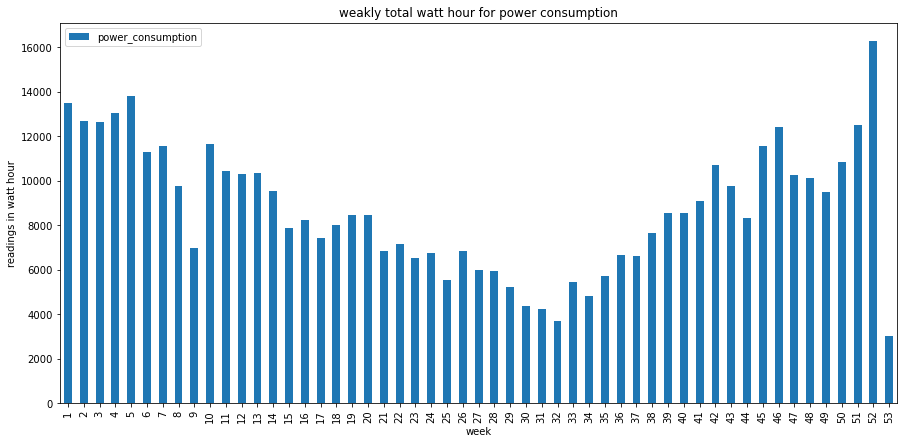

In [71]:
df_power_consumption.groupby(df_power_consumption.index.week).sum().plot(kind="bar",xlabel="week",ylabel="readings in watt hour", title="weakly total watt hour for power consumption",figsize=(15,7))

## sub metering analysis for yearly, quartely, monthly and weekly

## yearly maximum watt hour for sub_meterings

<AxesSubplot:title={'center':'yearly maximum watt hour for sub meterings'}, xlabel='year', ylabel='readings in watt hour'>

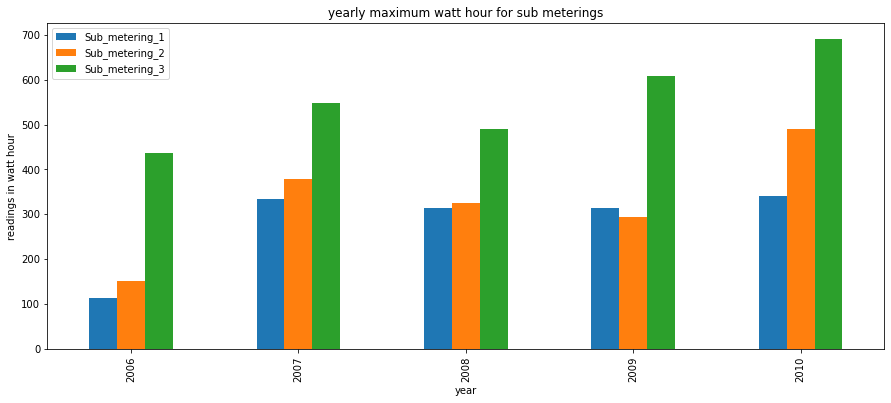

In [73]:
## yearly maximum watt hour for sub_meterings

df_sub_meterings.groupby(df_sub_meterings.index.year).max().plot(kind="bar",xlabel="year",ylabel="readings in watt hour",title="yearly maximum watt hour for sub meterings",figsize=(15,6))

## monthly total watt-hour for submeterings

<AxesSubplot:title={'center':'monthly total hour for submeterings'}, xlabel='month', ylabel='readings in watt hour'>

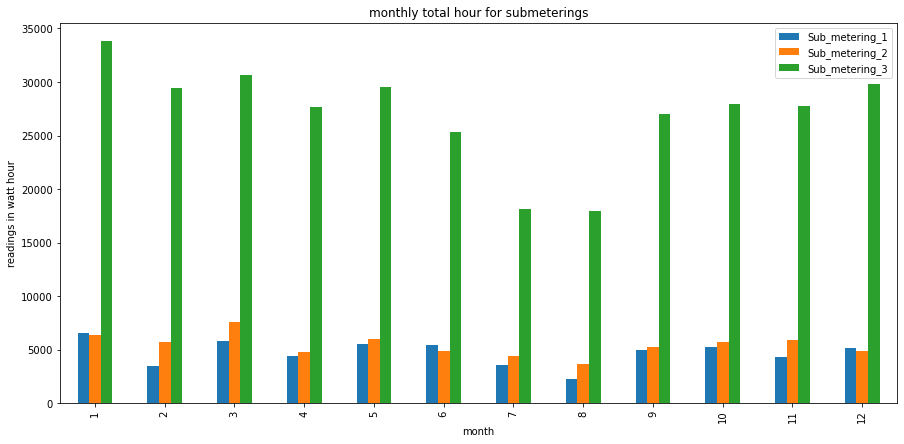

In [77]:
df_sub_meterings.groupby(df_sub_meterings.index.month).sum().plot(kind="bar",xlabel="month",ylabel="readings in watt hour",title="monthly total hour for submeterings",figsize=(15,7))

## Quartely total watt hour for sub meterings

<AxesSubplot:title={'center':'quartely total watt hour for sub meterings'}, xlabel='quarter', ylabel='readings in watt hour'>

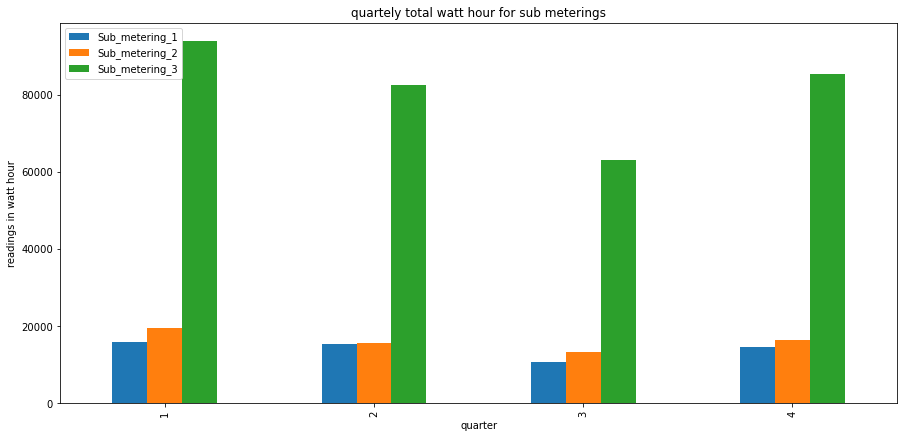

In [79]:
df_sub_meterings.groupby(df_sub_meterings.index.quarter).sum().plot(kind="bar",xlabel="quarter",ylabel="readings in watt hour",figsize=(15,7),title="quartely total watt hour for sub meterings")

In [37]:
dfs.drop(['time'],axis=1,inplace=True)

In [38]:
dfs.drop(['Date'],axis=1,inplace=True)

In [39]:
dfs.reset_index(drop=True)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,0.342,0.092,241.44,1.4,0.0,0.0,1.0,4.700000
1,0.342,0.000,244.62,1.6,0.0,0.0,0.0,5.700000
2,0.424,0.150,248.37,1.8,0.0,0.0,1.0,6.066667
3,0.254,0.052,239.96,1.0,0.0,0.0,1.0,3.233333
4,1.400,0.000,243.44,5.8,0.0,0.0,18.0,5.333333
...,...,...,...,...,...,...,...,...
49995,0.282,0.146,243.02,1.2,0.0,0.0,1.0,3.700000
49996,0.264,0.104,241.12,1.2,0.0,0.0,1.0,3.400000
49997,1.394,0.130,238.73,5.8,0.0,1.0,17.0,5.233333
49998,1.374,0.062,238.27,5.6,0.0,0.0,0.0,22.900000


## independent and dependent feature seperation

### independent feature

In [42]:
X = dfs.drop("power_consumption",axis=1)

## dependent feature

In [43]:
y = dfs['power_consumption']

In [44]:
print(X.shape,  y.shape)

(50000, 7) (50000,)


## Spliting the data into train and test and split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [48]:
print(X_train.shape,y_train.shape)

(33500, 7) (33500,)


In [49]:
print(X_test.shape,y_test.shape)

(16500, 7) (16500,)


## Standardizing or feature scalling the dataset

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [52]:
X_train =scaler.fit_transform(X_train)

In [53]:
X_test = scaler.transform(X_test)

In [54]:
X_train

array([[-0.82643886, -1.09811827,  0.17242787, ..., -0.18215717,
        -0.2190066 , -0.77037666],
       [ 0.39700942, -1.09811827, -0.75992672, ..., -0.18215717,
        -0.2190066 ,  1.35307602],
       [-0.7390497 ,  1.15777205,  0.08934677, ..., -0.18215717,
        -0.04824619, -0.65240707],
       ...,
       [ 0.37041272, -0.41077669,  0.49244396, ..., -0.18215717,
        -0.2190066 ,  1.47104562],
       [ 0.23932897, -0.4988974 , -0.99686171, ..., -0.18215717,
        -0.2190066 ,  1.23510643],
       [ 0.39700942,  0.84053747,  0.17858202, ..., -0.02148668,
        -0.2190066 ,  1.35307602]])

In [55]:
X_test

array([[-0.88913109,  0.04745103,  1.14170739, ..., -0.18215717,
        -0.2190066 , -0.65240707],
       [ 0.43120518,  0.10032346, -0.1506653 , ..., -0.18215717,
         0.29327463,  1.35307602],
       [-0.57946949, -0.0054214 ,  1.22478849, ..., -0.18215717,
        -0.2190066 , -0.77037666],
       ...,
       [-0.81124074, -0.14641454,  0.49244396, ..., -0.18215717,
        -0.2190066 , -0.77037666],
       [-0.74474899, -0.18166283,  0.54783137, ..., -0.18215717,
         0.12251422, -0.77037666],
       [ 1.35639045, -0.30503183,  1.26786758, ..., -0.18215717,
        -0.2190066 ,  1.47104562]])

## Model Training

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [58]:
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor,X,y,cv=10)

array([0.98802833, 0.98983305, 0.99193655, 0.98664617, 0.99019449,
       0.99205174, 0.9848243 , 0.98415036, 0.98990737, 0.99045092])

In [59]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [60]:
y_predict = regressor.predict(X_test)

## Performance metrics

### RSquared

In [61]:
from sklearn.metrics import r2_score

In [62]:
dtr_score = r2_score(y_test,y_predict)

In [63]:
dtr_score

0.9826464046247843

### Adjusted R Squared

In [64]:
1 - (1-dtr_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9826390389221632